In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('customer_churn.csv')

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [7]:
df['TotalCharges'].dtype

dtype('float64')

# 1. DATA MANIPULATION

 Extract the 5th column and store it in ‘customer_5’

In [8]:
customer_5 = df.iloc[:,4]
customer_5

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object

● Extract the 15th column and store it in ‘customer_15’

In [9]:
customer_15 = df.iloc[:,14]
customer_15

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingMovies, Length: 7043, dtype: object

● Extract all the male senior citizens whose payment method is electronic
check and store the result in ‘senior_male_electronic’

In [10]:
senior_male_electronic = df[(df['SeniorCitizen']==1)
                           & (df['PaymentMethod']=='Electronic check')
                           & (df['gender']=='Male')
                           ]
senior_male_electronic

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.30,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.70,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.60,No
6894,1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.30,Yes
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes


● Extract all those customers whose tenure is greater than 70 months or
their monthly charges is more than $100 and store the result in
‘customer_total_tenure’


In [11]:
customer_total_tenure = df[(df['tenure']>70)
                           | (df['MonthlyCharges']>100)
                          ]
customer_total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.10,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.40,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No


● Extract all the customers whose contract is of two years, payment method
is mailed check and the value of churn is ‘Yes’ and store the result in
‘two_mail_yes’

In [12]:
two_mail_yes = df[(df['Contract']== 'Two year')
                 &(df['PaymentMethod']=='Mailed check')
                 &(df['Churn']=='Yes')
                 ]
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.60,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.30,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


● Extract 333 random records from the customer_churn dataframe and store
the result in ‘customer_333’

In [13]:
customer_333 = df.sample(n=333)
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7010,0723-DRCLG,Female,1,Yes,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.45,74.45,Yes
6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4062,1915-IOFGU,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,70.50,70.50,Yes
3950,5655-JSMZM,Male,1,No,No,49,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,96.20,4718.25,Yes
4235,7629-WFGLW,Female,1,Yes,No,56,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,One year,No,Electronic check,95.65,5471.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,9191-MYQKX,Female,0,Yes,No,7,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.15,496.90,Yes
389,5522-JBWMO,Male,0,No,Yes,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,44.00,44.00,No
669,0214-JHPFW,Female,0,Yes,No,70,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),57.80,4039.30,No
3190,3745-HRPHI,Male,0,Yes,Yes,66,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),54.65,3632.00,No


● Get the count of different levels from the ‘Churn’ column

In [14]:
df['Churn'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

# 2. Data Visualization:

● Build a bar-plot for the ’InternetService’ column:\
a. Set x-axis label to ‘Categories of Internet Service’\
b. Set y-axis label to ‘Count of Categories’\
c. Set the title of plot to be ‘Distribution of Internet Service’\
d. Set the color of the bars to be ‘orange'

Text(0.5, 1.0, 'Distribution of internet service')

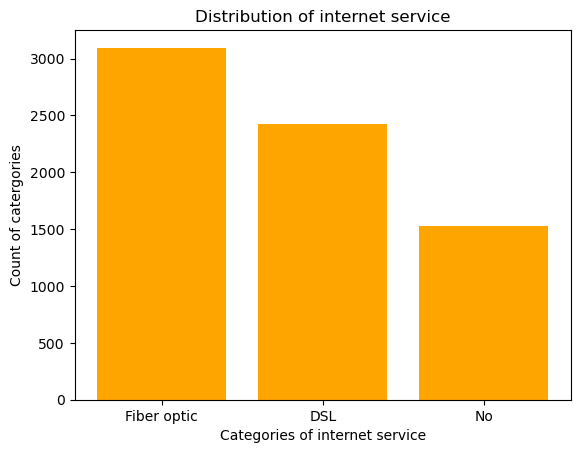

In [15]:
internet_service = df['InternetService'].value_counts()
plt.bar(internet_service.index,internet_service.values,color='orange')
plt.xlabel('Categories of internet service')
plt.ylabel('Count of catergories')
plt.title('Distribution of internet service')

● Build a histogram for the ‘tenure’ column:\
a. Set the number of bins to be 30\
b. Set the color of the bins to be ‘green’\
c. Assign the title ‘Distribution of 'tenure'

Text(0, 0.5, 'count')

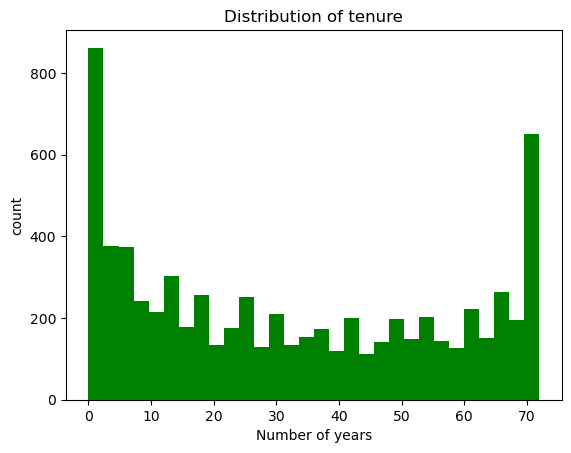

In [16]:
plt.hist(df['tenure'],bins=30,color = 'green')
plt.title('Distribution of tenure')
plt.xlabel('Number of years')
plt.ylabel('count')

Build a scatter-plot between ‘MonthlyCharges’ and ‘tenure’. Map
‘MonthlyCharges’ to the y-axis and ‘tenure’ to the ‘x-axis’:\
a. Assign the points a color of ‘brown’\
b. Set the x-axis label to ‘Tenure of customer’\
c. Set the y-axis label to ‘Monthly Charges of customer’\
d. Set the title to ‘Tenure vs Monthly Charges’\
e. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the
y-axis &\
f. ‘Contract’ on the x-axis.

1.SCATTER PLOT

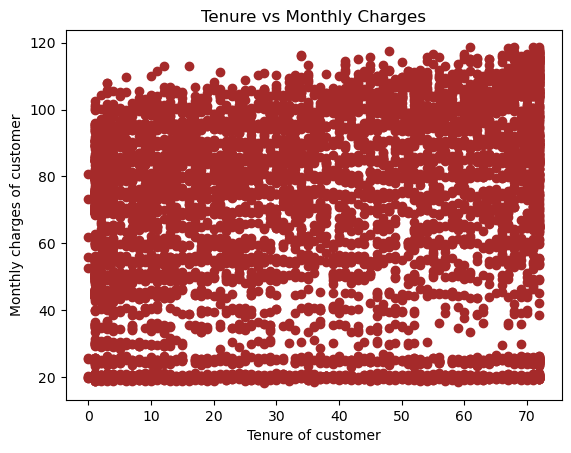

In [17]:
plt.scatter(y=df['MonthlyCharges'],x=df['tenure'],color = 'brown')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

<Axes: xlabel='Contract', ylabel='tenure'>

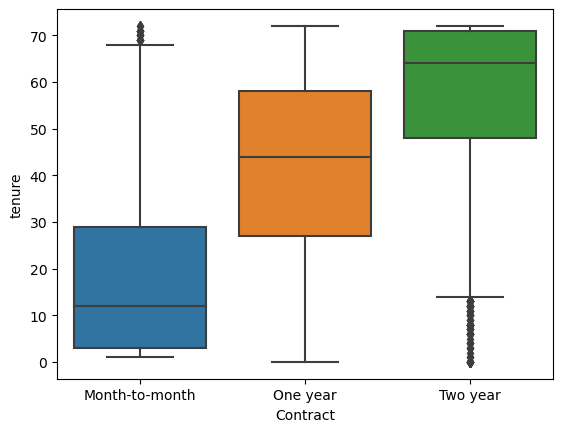

In [18]:
sns.boxplot(x='Contract',y='tenure',data=df)

# Linear Regression:

● Build a simple linear model where dependent variable is ‘MonthlyCharges’
and independent variable is ‘tenure’:\
a. Divide the dataset into train and test sets in 70:30 ratio.\
b. Build the model on train set and predict the values on test set\
c. After predicting the values, find the root mean square error\
d. Find out the error in prediction & store the result in ‘error’\
e. Find the root mean square error

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [20]:
x = pd.DataFrame(df['tenure'])
y = pd.DataFrame(df['MonthlyCharges'])

In [21]:
print(x.shape,y.shape)

(7043, 1) (7043, 1)


In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4930, 1)
(2113, 1)
(4930, 1)
(2113, 1)


In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [26]:
print(regressor.intercept_)

[54.80186731]


In [27]:
print(regressor.coef_)

[[0.3100844]]


In [28]:
y_pred = regressor.predict(x_test)
y_pred

array([[67.51532767],
       [75.26743764],
       [58.5228801 ],
       ...,
       [61.31363969],
       [76.50777524],
       [68.75566526]])

In [29]:
y_pred = pd.DataFrame(y_pred,columns=['Predicted'])
y_pred

,Predicted
0,67.515328
1,75.267438
2,58.522880
3,56.352289
4,57.902711
...,...
2108,57.902711
2109,58.212796
2110,61.313640
2111,76.507775


In [30]:
y_test

,MonthlyCharges
3381,79.85
6180,102.40
4829,45.00
3737,50.60
4249,65.90
...,...
3934,40.25
1351,20.45
2048,96.80
6218,58.40


In [31]:
df_pred = pd.DataFrame(columns=['Actual','Pred'])
df_pred['Actual'] = y_test.reset_index()['MonthlyCharges']
df_pred['Pred'] = y_pred.reset_index()['Predicted']

In [32]:
error = df_pred['Pred'] - df_pred['Actual']
error

0      -12.334672
1      -27.132562
2       13.522880
3        5.752289
4       -7.997289
          ...    
2108    17.652711
2109    37.762796
2110   -35.486360
2111    18.107775
2112    -4.794335
Length: 2113, dtype: float64

In [33]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 25.237101628974784
Mean Squared Error: 850.043757180835
Root Mean Squared Error: 29.15550989402921


In [34]:
from sklearn.metrics import r2_score

In [35]:
r2_score(y_test,y_pred)

0.05563865568825355

# 4. Logistic Regression:
● Build a simple logistic regression model where dependent variable is
‘Churn’ and independent variable is ‘MonthlyCharges’:\
a. Divide the dataset in 65:35 ratio\
b. Build the model on train set and predict the values on test set\
c. Build the confusion matrix and get the accuracy score\
d. Build a multiple logistic regression model where dependent variable
is ‘Churn’ and independent variables are ‘tenure’ and
‘MonthlyCharges’\
e. Divide the dataset in 80:20 ratio\
f. Build the model on train set and predict the values on test set\
g. Build the confusion matrix and get t

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
x = pd.DataFrame(df['MonthlyCharges'])                    
y = pd.DataFrame(df['Churn'])

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.35,random_state=3)

In [39]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4577, 1)
(2466, 1)
(4577, 1)
(2466, 1)


In [40]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

C:\Users\HP\anaconda3\anaconda for me\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [41]:
y_pred = logmodel.predict(x_test)

In [42]:
len(y_pred)

2466

In [43]:
print('Accuracy: ', (logmodel.score(x_train, y_train)))

Accuracy:  0.7343237928774307


In [44]:
from sklearn.metrics import confusion_matrix, classification_report

In [45]:
confusion_matrix = confusion_matrix(y_train,logmodel.predict(x_train))
print(confusion_matrix)

[[3361    0]
 [1216    0]]


In [46]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
print(classification_report(y_train, logmodel.predict(x_train)))

              precision    recall  f1-score   support

          No       0.73      1.00      0.85      3361
         Yes       0.00      0.00      0.00      1216

    accuracy                           0.73      4577
   macro avg       0.37      0.50      0.42      4577
weighted avg       0.54      0.73      0.62      4577



In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.74      1.00      0.85      1813
         Yes       0.00      0.00      0.00       653

    accuracy                           0.74      2466
   macro avg       0.37      0.50      0.42      2466
weighted avg       0.54      0.74      0.62      2466



d. Build a multiple logistic regression model where dependent variable
is ‘Churn’ and independent variables are ‘tenure’ and
‘MonthlyCharges’\
e. Divide the dataset in 80:20 ratio\
f. Build the model on train set and predict the values on test set\
g. Build the confusion matrix and get the accuracy score

In [49]:
x = pd.DataFrame(df[['tenure','MonthlyCharges']])
y = pd.DataFrame(df['Churn'])

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [51]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 2)
(1409, 2)
(5634, 1)
(1409, 1)


In [52]:
regressor2 = LogisticRegression()
regressor2.fit(x_train,y_train)

LogisticRegression()

In [53]:
y_pred = regressor2.predict(x_test)
len(y_pred)

1409

In [54]:
y_train

,Churn
4169,Yes
3571,No
1352,No
1278,No
938,No
...,...
6443,No
3606,No
5704,No
6637,No


In [55]:
regressor2.score(x_train,y_train)

0.7813276535321264

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
confusion_matrix = confusion_matrix(y_train,regressor2.predict(x_train))
confusion_matrix

array([[3716,  397],
       [ 835,  686]], dtype=int64)

In [58]:
classification_report = classification_report(y_train,regressor2.predict(x_train))

In [59]:
print(classification_report)

              precision    recall  f1-score   support

          No       0.82      0.90      0.86      4113
         Yes       0.63      0.45      0.53      1521

    accuracy                           0.78      5634
   macro avg       0.72      0.68      0.69      5634
weighted avg       0.77      0.78      0.77      5634



5. Decision Tree:\
● Build a decision tree model where dependent variable is ‘Churn’ and
independent variable is ‘tenure’:\
a. Divide the dataset in 80:20 ratio\
b. Build the model on train set and predict the values on test set\
c. Build the confusion matrix and calculate the accuracy

In [60]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [61]:
x = pd.DataFrame(df['tenure'])
y = pd.DataFrame(df['Churn'])
y

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1,test_size=0.2)
print(x_train.shape)
print(x_train.shape)
print(x_train.shape)
print(x_train.shape)

(5634, 1)
(5634, 1)
(5634, 1)
(5634, 1)


In [63]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [64]:
y_train_pred = pd.DataFrame(dtc.predict(x_train))

y_test_pred = pd.DataFrame(dtc.predict(x_test))

In [65]:
y_train_pred

,0
0,No
1,No
2,No
3,No
4,No
...,...
5629,No
5630,No
5631,No
5632,Yes


In [66]:
len(y_train_pred)

5634

In [67]:
len(y_test_pred)

1409

In [68]:
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,cmap='Blues')
    plt.tight_layout()
    plt.show()

In [69]:
from sklearn.metrics import accuracy_score

In [70]:
print(f'train_accuracy {accuracy_score(y_train_pred,y_train)}')
print(f'test_accuracy {accuracy_score(y_test_pred,y_test)}')

train_accuracy 0.7547035853745119
test_accuracy 0.7643718949609652


train Data Confusion matrix


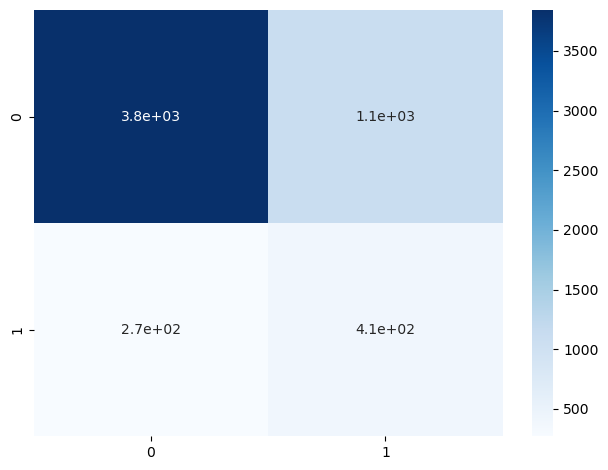

In [72]:
from sklearn.metrics import confusion_matrix
plot_confusionmatrix(y_train_pred,y_train,dom='train Data')

Test Data Confusion matrix


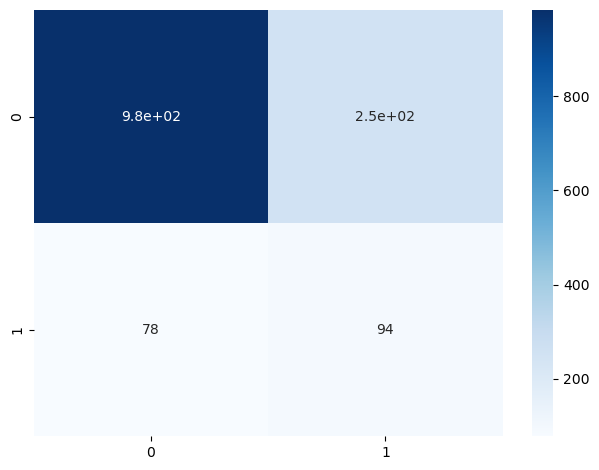

In [73]:
plot_confusionmatrix(y_test_pred,y_test,dom='Test Data')

In [74]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [75]:
predicted_labels = dtc.predict(x_train)
cm = confusion_matrix(y_train, predicted_labels)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[3843  270]
 [1112  409]]


In [76]:
from sklearn.metrics import confusion_matrix

6. Random Forest:
● Build a Random Forest model where dependent variable is ‘Churn’ and
independent variables are ‘tenure’ and ‘MonthlyCharges’:\
a. Divide the dataset in 70:30 ratio\
b. Build the model on train set and predict the values on test set\
c. Build the confusion matrix and calculate the accuracy


In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
x = df[['tenure','MonthlyCharges']]
y = pd.DataFrame(df['Churn'])

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=4,test_size=0.3)

In [80]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [81]:
y_pred = rf.predict(x_test)

In [82]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1307  256]
 [ 302  248]]


In [83]:
accuracy_score(y_test,y_pred)

0.7359204921911974

In [84]:
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

In [85]:
accuracy_score(y_train,y_train_pred)

0.9831643002028397

In [86]:
accuracy_score(y_test,y_test_pred)

0.7359204921911974